### CANNY EDGE DETECTION

Change in the pixel densities in an image leads to identification of dark ,gray and extreme "white" edges which can further be thinned out using canny edge detection.

edges_image = cv2.Canny(gray_image,low_threshold, high_threshold)

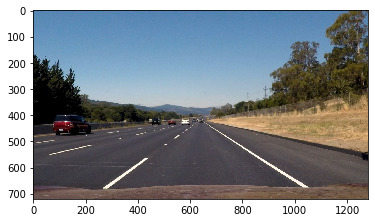

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

main_image=mpimg.imread('test.jpg')
plt.imshow(main_image)

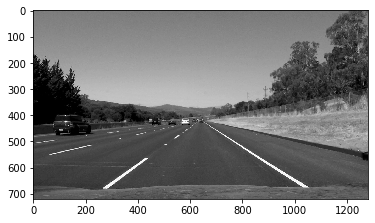

In [37]:
import cv2
gray_image=cv2.cvtColor(main_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image,cmap='gray')

In [32]:
#Applying Canny detection - cv2.Canny(gray,low_threshold, high_threshold)

#Alogithm will first detect strong edge pixels above high_threshold and reject pixels below low threshold
#Next , the pixel values between low_threshold and high_threshold will be included as long as 
#they are connected to strong ones

#Output: Binary image with white pixels tracing out detected edges and black everywhere else 


#applying Guassian blurring with kernel_size=3
kernel_size = 9    #any odd number (3,5,7...)
blur_gray = cv2.GaussianBlur(gray_image,(kernel_size, kernel_size), 0)

low_threshold = 10
high_threshold = 100
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

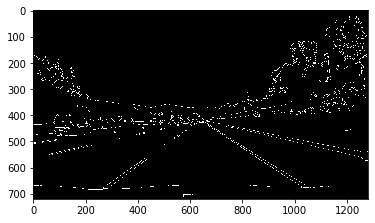

In [34]:
# Display the image
plt.imshow(edges, cmap='Greys_r')

### HOUGH TRANSFORM

In hough Space or parameter space the X & Y cordinates are represented by (M,B).The Hough Transform is just the conversion from image space to Hough space

In [45]:
#Define Hough space parameters 
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(main_image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

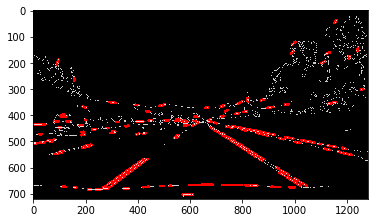

In [48]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)